### Code for Risk Level Prediction Model for Maternal Health Care (Bangladesh)

- Authors : Nitin Gautam [2020HES7035]

As part of submission for MTL782 - Data Mining

In [217]:
# importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy.stats import chi2_contingency
from scipy.stats import chi2

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

In [218]:
# importing dataset 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.00,86,high risk
1,35,140,90,13.00,98.00,70,high risk
2,29,90,70,8.00,100.00,80,high risk
3,30,140,85,7.00,98.00,70,high risk
4,35,120,60,6.10,98.00,76,low risk


(i) Your first task is characterize the data set. Answer the following questions about the data

1. What the data is about.

In [219]:
# Printing basic summary statisitcs of dataset
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,"1,014.00","1,014.00","1,014.00","1,014.00","1,014.00","1,014.00"
mean,29.87,113.20,76.46,8.73,98.67,74.30
std,13.47,18.40,13.89,3.29,1.37,8.09
min,10.00,70.00,49.00,6.00,98.00,7.00
25%,19.00,100.00,65.00,6.90,98.00,70.00
50%,26.00,120.00,80.00,7.50,98.00,76.00
75%,39.00,120.00,90.00,8.00,98.00,80.00
max,70.00,160.00,100.00,19.00,103.00,90.00


In [220]:
print(df.describe().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &      Age &  SystolicBP &  DiastolicBP &       BS &  BodyTemp &  HeartRate \\
\midrule
count & 1,014.00 &    1,014.00 &     1,014.00 & 1,014.00 &  1,014.00 &   1,014.00 \\
mean  &    29.87 &      113.20 &        76.46 &     8.73 &     98.67 &      74.30 \\
std   &    13.47 &       18.40 &        13.89 &     3.29 &      1.37 &       8.09 \\
min   &    10.00 &       70.00 &        49.00 &     6.00 &     98.00 &       7.00 \\
25\%   &    19.00 &      100.00 &        65.00 &     6.90 &     98.00 &      70.00 \\
50\%   &    26.00 &      120.00 &        80.00 &     7.50 &     98.00 &      76.00 \\
75\%   &    39.00 &      120.00 &        90.00 &     8.00 &     98.00 &      80.00 \\
max   &    70.00 &      160.00 &       100.00 &    19.00 &    103.00 &      90.00 \\
\bottomrule
\end{tabular}



In [221]:
# data type description of easch attribute 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Data set contains 

- medical data of pregnant women of Bangladesh where attributes were collected using Internet of things devices 
- dataset includes 

          Age : age of pregnant woman
          SystolicBP : Systolic Blood pressure  	
          DiastolicBP : Diastolic Blood pressure 
          BS : Blood Sugar	
          BodyTemp : Body Temperature 
          HeartRate : Heart Rate 
          
-  Outcome variable is about Risk stratification of the pregnant women based on observed attributes measured using IoT 

          Low Risk
          Mid Risk
          High Risk
          
          The classification and prediction of risk intensity during pregnancy is a multilayered problem

- Pregnant women are categorisied into high and low risk based on these measured attributes. 
- All these attributes are continuous variable and outcome variable is multi class categorical/indicator variable. 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


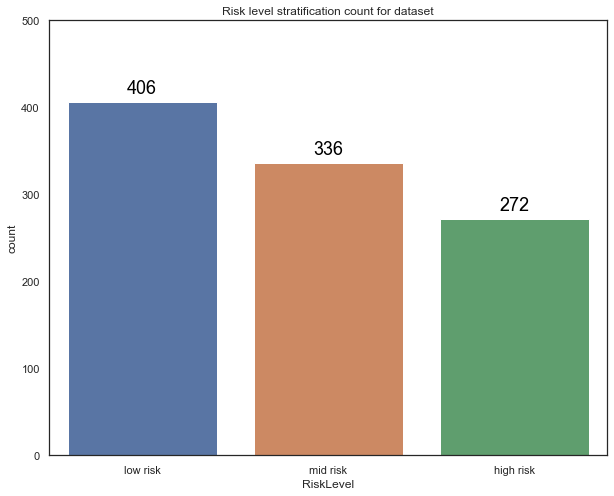

In [222]:
plt.figure(figsize= (10,8))
ax = sns.countplot('RiskLevel', data=df, order = df['RiskLevel'].value_counts().index)
plt.ylim(0, 500)
plt.title('Risk level stratification count for dataset')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+ 0.4, p.get_height()+ 50), ha='center', va='top', color='black', size=18)
plt.show();

2) What type of benefit you might hope to get from data mining. 

- Data Mining study is to solve the maternal healthcare problem, mainly for the rural areas of a developing country. 
- Study will help to reduce the problems of pregnant women as well as a newborn baby.  
- Thus, risk stratification using data mining will increase the safety of maternal health as well as the unborn baby

3) Discuss data quality issues: For each attribute,
          
          a) Are there problems with the data?
          b) What might be an appropriate response to the quality issues

In [223]:
# checking for null or missing values in dataset
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

- None of attributes is missing in dataset, hence minimum quality issues
- If quality issues existed, these can be resolved using 

          1. If attribute data is missing for a row, dropping/discarding individual pregnant women data
          2. Filling missing dataset with most common values or mean of columns 

(ii) Implement
          
          (1) Decision Tree
          (2) Random Forest
          (3) Naïve Bayes Classifier
          (4) KNN classifier 

compare the performances using k-fold cross validation and other tuning techniques.

## Exploratory Data Analysis

Chi-square test values to check whether or not a particular attribute is influential on the response

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

In [224]:
significance = 0.01
p = 1 - significance

attributes = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
df_chi = pd.DataFrame(index = ['chi-square', 'p-value', 'Critical value', 'Influential'], columns=attributes)

for attribute in attributes:
          contigency = pd.crosstab(df[attribute], df['RiskLevel'])
          chi2_result = chi2_contingency(contigency)
          dof = chi2_result[2] # degree of freedom 
          critical_value = chi2.ppf(p, dof)
          df_chi.at['chi-square', attribute] = chi2_result[0]
          df_chi.at['p-value', attribute] = chi2_result[1]
          df_chi.at['Critical value', attribute] = critical_value
          df_chi.at['Influential', attribute] = 'yes' if chi2_result[0] > critical_value else 'no'

df_chi

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
chi-square,500.92,556.24,323.26,663.13,61.96,212.91
p-value,0.00,0.00,0.00,0.00,0.00,0.00
Critical value,133.48,58.62,50.89,83.51,29.14,50.89
Influential,yes,yes,yes,yes,yes,yes


Feature selection using SVM RFE

Optimal number of features : 6


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


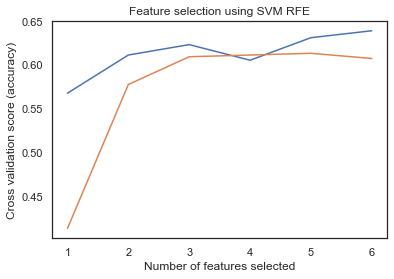

In [261]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Load dataset
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.title('Feature selection using SVM RFE')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

using decision tree for feature selection

Optimal number of features : 5


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


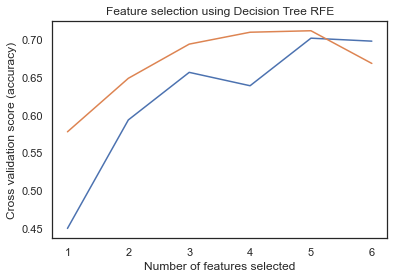

In [262]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Load dataset
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']

# Create the RFE object and compute a cross-validated score.
d_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=d_tree,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.title('Feature selection using Decision Tree RFE')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [227]:
# Load dataset
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']

from sklearn.preprocessing import StandardScaler

#encoding categorical fetures and target variable
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(X)
df_encoded = pd.DataFrame(data_encoded)
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(y)
df_encoded['RiskLevel'] = target_encoded

scaler = StandardScaler()
scaler.fit(X)
#scaler.fit(y)
X_standardized = scaler.transform(X)
#y_standardized = scaler.transform(y)

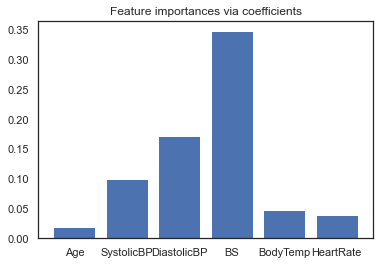

In [228]:
from sklearn.linear_model import RidgeCV

# feature importance via cofficients
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_standardized, df_encoded['RiskLevel'])
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [229]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X_standardized, df_encoded['RiskLevel'])
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['DiastolicBP' 'BS']
Done in 0.003s


In [230]:
# sequential feature selection 
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=2, direction="forward").fit(X_standardized, df_encoded['RiskLevel'])
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(ridge, n_features_to_select=2, direction="backward").fit(X_standardized, df_encoded['RiskLevel'])
toc_bwd = time()

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print("Features selected by backward sequential selection: "f"{feature_names[sfs_backward.get_support()]}")
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['DiastolicBP' 'BS']
Done in 0.231s
Features selected by backward sequential selection: ['DiastolicBP' 'BS']
Done in 0.241s


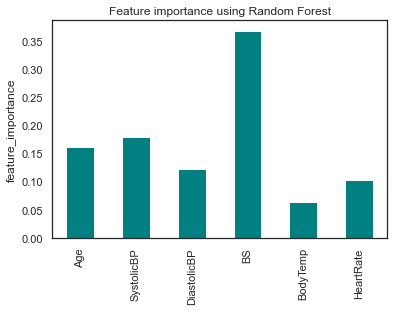

In [263]:
# Random Forest importance 
from sklearn.ensemble import RandomForestClassifier

# Create the random forest with hyperparamater
model = RandomForestClassifier(n_estimators=300)

# fit the model 
model.fit(X, y)

# get the importance of the resulting feature 
importances = model.feature_importances_
feature_importances = pd.Series(importances, X.columns)
feature_importances.plot(kind='bar', color='teal')
plt.title('Feature importance using Random Forest')
plt.ylabel('feature_importance')
plt.show()

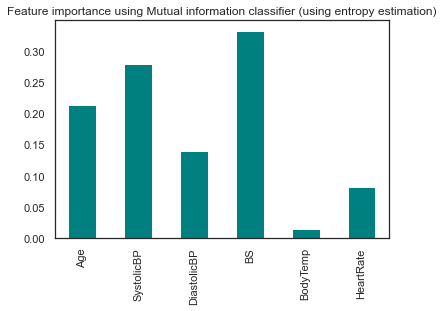

In [264]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y)
feature_importances = pd.Series(importances, X.columns)
feature_importances.plot(kind='bar', color='teal')
plt.title('Feature importance using Mutual information classifier (using entropy estimation)')
plt.show()

<AxesSubplot:>

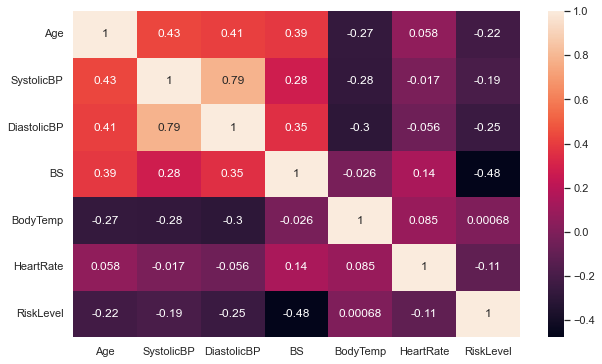

In [233]:
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df)
cor = df_encoded.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(cor, xticklabels= df.columns, yticklabels=df.columns, annot=True)

In [234]:
"""
# Lasso Regularisation (L1) for feature selection 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# set the regularization parameter C=1
logistic = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)

# Dropped columns have values of all 0s, keep other columns
#selected_columns = selected_features.columns[selected_features.var() !=0]
#selected_columns
""";

The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

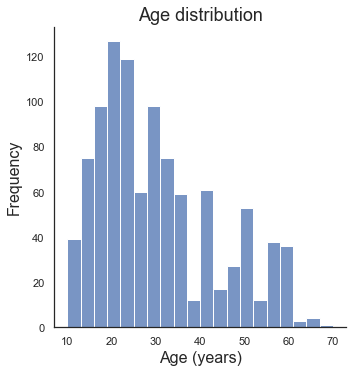

In [235]:
# Age distribution 
sns.displot(df['Age'], bins=20)
plt.title('Age distribution', fontsize=18)
plt.xlabel('Age (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [236]:
# removing outliers 
from scipy.stats import zscore

zscore_df = zscore(df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']])
zscore_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.36,0.91,0.26,1.91,-0.49,1.45
1,0.38,1.46,0.98,1.30,-0.49,-0.53
2,-0.06,-1.26,-0.47,-0.22,0.97,0.70
3,0.01,1.46,0.62,-0.52,-0.49,-0.53
4,0.38,0.37,-1.19,-0.80,-0.49,0.21
...,...,...,...,...,...,...
1009,-0.58,0.37,-1.19,1.91,-0.49,0.70
1010,1.87,0.37,0.98,2.82,-0.49,-1.77
1011,0.38,-1.53,-1.19,3.12,-0.49,1.45
1012,0.97,0.37,0.98,2.82,-0.49,-0.53


<Figure size 1080x720 with 0 Axes>

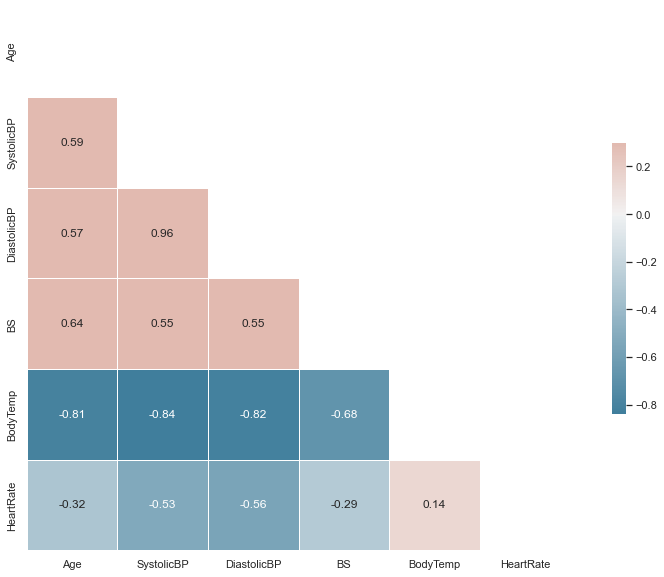

In [237]:
sns.set_theme(style="white")

# pairwise correlation heatmap
plt.figure(figsize = (15, 10))
data_pair = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']].corr()
Var_Corr = data_pair.corr()
matrix = np.triu(Var_Corr)
f, ax = plt.subplots(figsize = (15, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plot the heatmap and annotation 
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, mask = matrix, 
            cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# plt.tight_layout()
plt.savefig('plots\heat.png', dpi=350)

Pre-processing dataset and cleaning 

Mapping categorical class variable to 0, 1, 2

In [283]:
model_performance = pd.DataFrame(index = [['Decision Tree', 'Random Forest', 'Naive Bayes', 'K-NN']], 
                    columns = [['Accuracy score', 'Precision', 'Recall', 'F-score', 'ROC-AUC score']])

In [238]:
# create a copy of dataframe and then check 
df1 = df.copy()
df1['RiskLevel']= df1['RiskLevel'].map({'low risk':0 , 'mid risk':1, 'high risk':2}) 

# dataset for training and testing - X are attribute selection and Y are class selection
X = df1.values[:, 0:-1]
Y = df1.values[:,-1]

# scaling the dataset
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

X = df.values[:, 0:-1]
Y = df.values[:,-1]

#encoding categorical fetures and target variable
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(X)
df_encoded = pd.DataFrame(data_encoded)
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(Y)
df_encoded['RiskLevel'] = target_encoded

#train and test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], test_size=0.3, random_state=100)

Accuracy score: 0.810
Precision : 0.806
Recall : 0.817
F-score : 0.808
ROC AUC of test set: 0.863


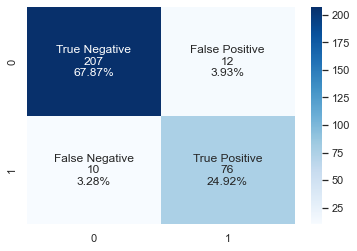

In [285]:
# training a Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree.fit(X_train, y_train)

# Predicting the Test set results
dtree_pred = dtree.predict(X_test)

# accuracy on X_test
accuracy = dtree.score(X_test, y_test)
#accuracy = dtree.score(X_train, y_train)
print('Accuracy score: %.3f' % accuracy)

# calculate precission, recall, fscore 
prf_score = precision_recall_fscore_support(y_test, dtree_pred, average='macro')
print('Precision : %.3f'% prf_score[0])
print('Recall : %.3f'% prf_score[1])
print('F-score : %.3f' % prf_score[2])

# calculate AUC
labels = df_encoded.RiskLevel.unique()
y_pred = label_binarize(dtree_pred, classes=labels)
#print(y_pred)
auc_test = roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')
print('ROC AUC of test set: %.3f' % auc_test)

model_performance.loc['Decision Tree','Accuracy score'] = prf_score[0]
model_performance.loc['Decision Tree','Precision'] = prf_score[0]
model_performance.loc['Decision Tree','Recall'] = prf_score[1]
model_performance.loc['Decision Tree','F-score'] = prf_score[2]
model_performance.loc['Decision Tree','ROC-AUC score'] = auc_test

# Visualize Confusion matrix 
cm = multilabel_confusion_matrix(y_test, dtree_pred)
cm

for i in range(0, 1):
          group_names = ['True Negative','False Positive','False Negative','True Positive']
          group_counts = ['{0:0.0f}'.format(value) for value in cm[i].flatten()]
          group_percentages = ['{0:.2%}'.format(value) for value in cm[i].flatten()/np.sum(cm[i])]
          labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
          labels = np.asarray(labels).reshape(2,2)
          sns.heatmap(cm[i], annot=labels, fmt='', cmap='Blues')

<Figure size 360x288 with 0 Axes>

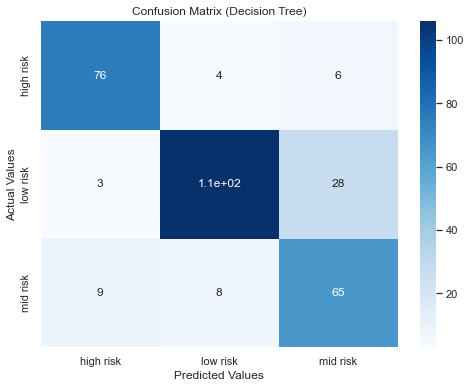

In [240]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, dtree_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['high risk', 'low risk', 'mid risk'], 
                     columns = ['high risk', 'low risk', 'mid risk'])

# plotting the confusion matrix
plt.figure(figsize =(5, 4))
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Decision Tree)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show();

<Figure size 360x288 with 0 Axes>

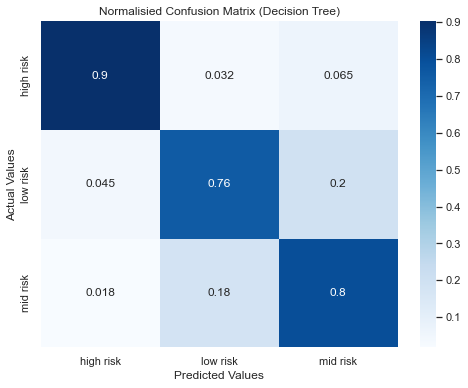

In [265]:
# Normalised Confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm,
                     index = ['high risk', 'low risk', 'mid risk'], 
                     columns = ['high risk', 'low risk', 'mid risk'])

# plotting the confusion matrix
plt.figure(figsize =(5, 4))
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Normalisied Confusion Matrix (Decision Tree)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show();

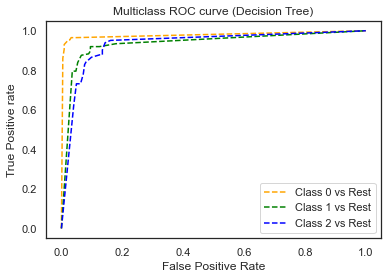

In [266]:
#predicting the data
y_pred_cnb = dtree.predict(X_test)
y_prob_pred_dtree = dtree.predict_proba(X_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_dtree, multi_class='ovo', average='weighted')

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_dtree[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [243]:
# cross validation based score
scores = cross_val_score(dtree, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=15, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.95394461 0.95641026 1.         0.85093587 0.85327464 0.6989418
 0.45524113 0.94025838 0.94360537 0.83290043 0.86745098 0.72377261
 0.71523686 0.92831293 0.798947  ]
0.83 accuracy with a standard deviation of 0.14


In [244]:
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

for i in range(1, 21):
          model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=i)
          s1 = cross_val_score(model, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=cv, n_jobs=-1)
          print("Tree depth %.1d : %0.2f accuracy with a standard deviation of %0.2f" % (i, s1.mean(), s1.std()))

Tree depth 1 : 0.59 accuracy with a standard deviation of 0.04
Tree depth 2 : 0.63 accuracy with a standard deviation of 0.03
Tree depth 3 : 0.67 accuracy with a standard deviation of 0.05
Tree depth 4 : 0.69 accuracy with a standard deviation of 0.04
Tree depth 5 : 0.70 accuracy with a standard deviation of 0.04
Tree depth 6 : 0.72 accuracy with a standard deviation of 0.04
Tree depth 7 : 0.74 accuracy with a standard deviation of 0.04
Tree depth 8 : 0.76 accuracy with a standard deviation of 0.05
Tree depth 9 : 0.76 accuracy with a standard deviation of 0.05
Tree depth 10 : 0.78 accuracy with a standard deviation of 0.05
Tree depth 11 : 0.79 accuracy with a standard deviation of 0.05
Tree depth 12 : 0.81 accuracy with a standard deviation of 0.05
Tree depth 13 : 0.82 accuracy with a standard deviation of 0.05
Tree depth 14 : 0.83 accuracy with a standard deviation of 0.05
Tree depth 15 : 0.84 accuracy with a standard deviation of 0.04
Tree depth 16 : 0.84 accuracy with a standard dev

In [245]:
# Hyperparameter tuning
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

tree_para = {'criterion':['gini','entropy'],'max_depth': np.arange(2,21)}
dtree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=cv)
dtree.fit(X_train, y_train)

dtree.best_params_

{'criterion': 'entropy', 'max_depth': 19}

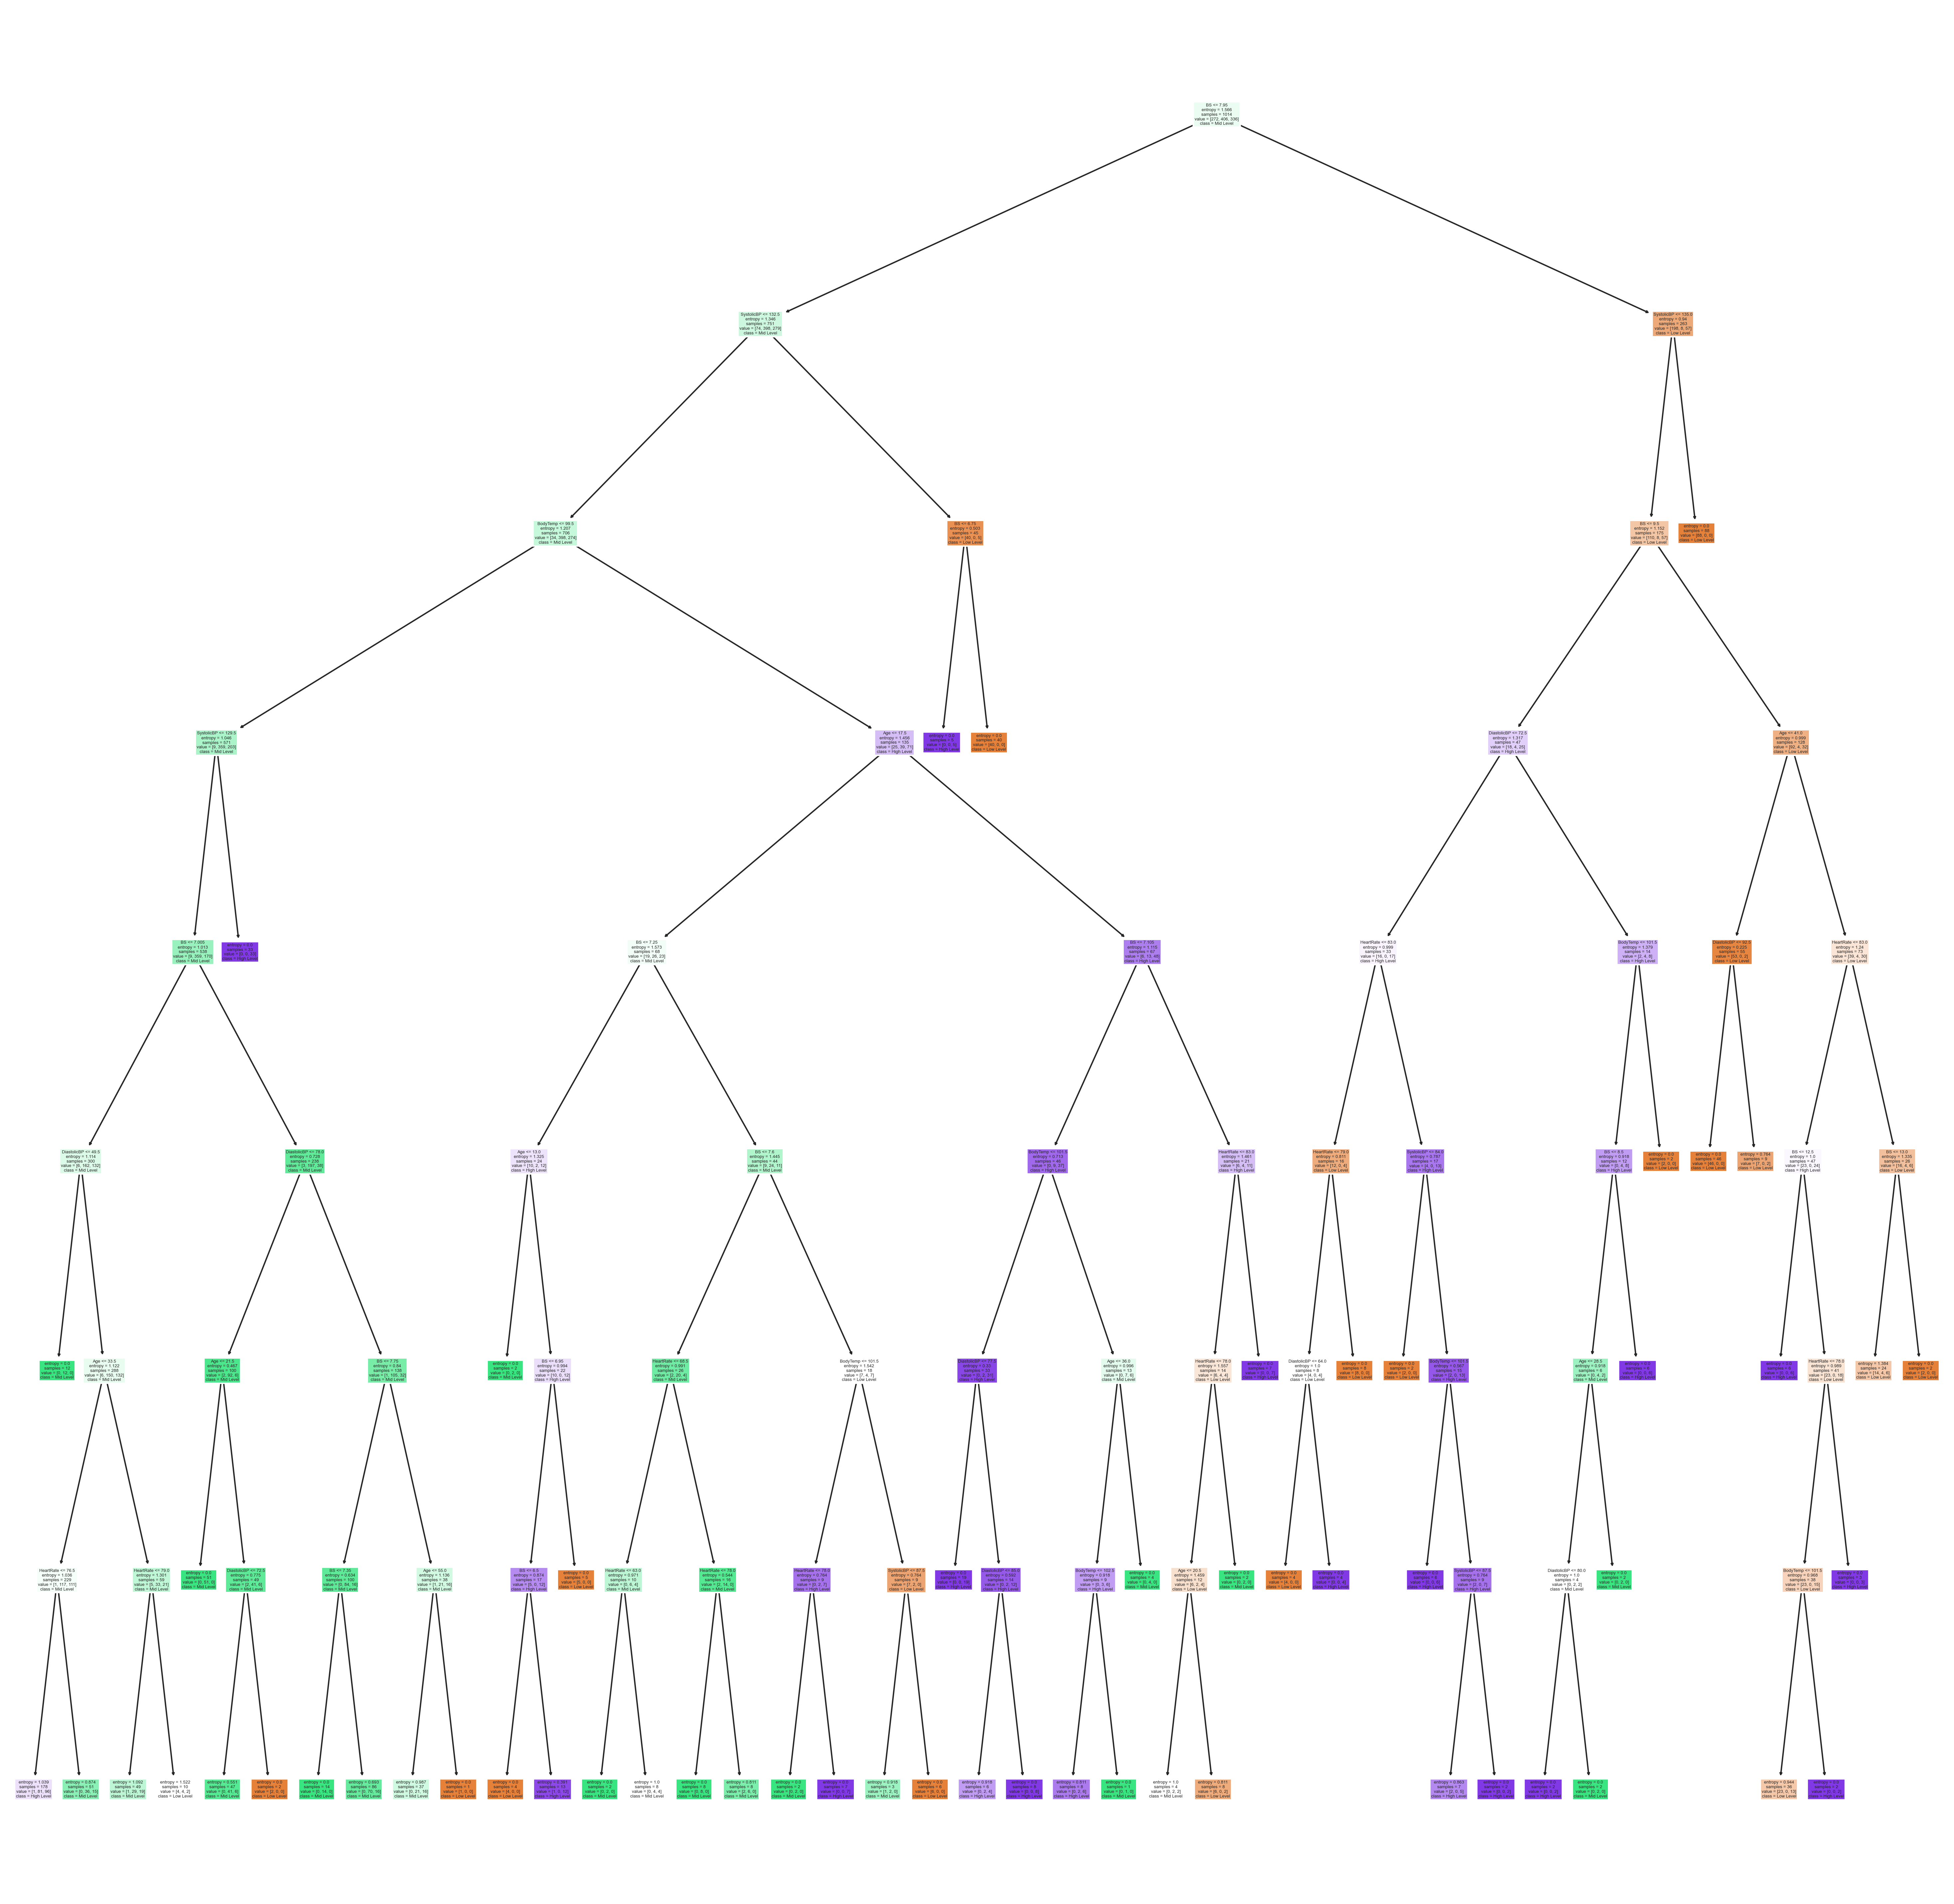

In [246]:
# Decision tree plot
import matplotlib.pyplot as plt
from sklearn import tree

# Make an instance of the Model
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=8)

# Train the model on the data
dtree.fit(X, Y)

fn=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
cn=['Low Level', 'Mid Level', 'High Level']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=300)

tree.plot_tree(dtree,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('dtree.png')

Accuracy score: 0.820
Precision : 0.816
Recall : 0.824
F-score : 0.817
ROC AUC of test set: 0.868


<Figure size 360x288 with 0 Axes>

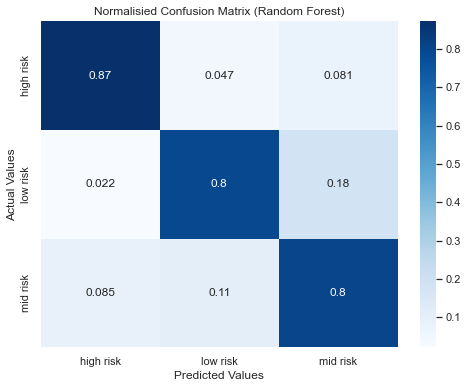

In [287]:
# training a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)

# Predicting the Test set results
RF_pred = RF.predict(X_test)

# accuracy on X_test
accuracy = RF.score(X_test, y_test)
print('Accuracy score: %.3f' % accuracy)

# calculate precission, recall, fscore 
prf_score = precision_recall_fscore_support(y_test, RF_pred, average='macro')
print('Precision : %.3f'% prf_score[0])
print('Recall : %.3f'% prf_score[1])
print('F-score : %.3f' % prf_score[2])

# calculate AUC
labels = df_encoded.RiskLevel.unique()
y_pred = label_binarize(RF_pred, classes=labels)
auc_test = roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')
print('ROC AUC of test set: %.3f' % auc_test)

model_performance.loc['Random Forest','Accuracy score'] = prf_score[0]
model_performance.loc['Random Forest','Precision'] = prf_score[0]
model_performance.loc['Random Forest','Recall'] = prf_score[1]
model_performance.loc['Random Forest','F-score'] = prf_score[2]
model_performance.loc['Random Forest','ROC-AUC score'] = auc_test

# Visualize Confusion matrix 
cm = multilabel_confusion_matrix(y_test, RF_pred)
cm

# Creating  a confusion matrix,which compares the y_test and RF_pred
cm = confusion_matrix(y_test, RF_pred)
cm

# Normalised Confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm,
                     index = ['high risk', 'low risk', 'mid risk'], 
                     columns = ['high risk', 'low risk', 'mid risk'])

# plotting the confusion matrix
plt.figure(figsize =(5, 4))
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Normalisied Confusion Matrix (Random Forest)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show();

In [288]:
model_performance

,Accuracy score,Precision,Recall,F-score,ROC-AUC score
Decision Tree,0.81,0.81,0.82,0.81,0.86
Random Forest,0.82,0.82,0.82,0.82,0.87
Naive Bayes,NaN,NaN,NaN,NaN,NaN
K-NN,NaN,NaN,NaN,NaN,NaN


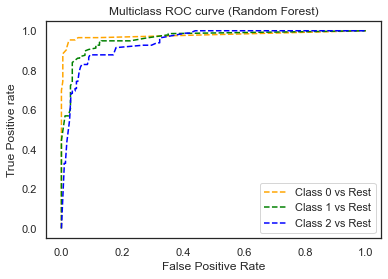

In [267]:
#predicting the data
y_pred_RF = RF.predict(X_test)
y_prob_pred_RF = RF.predict_proba(X_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_RF, multi_class='ovo', average='weighted')

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_RF[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [295]:
# cross validation based score
scores = cross_val_score(RF, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=15, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.95394461 0.9558515  0.98306878 0.85052555 0.82186933 0.56177606
 0.62896983 0.94025838 0.9280117  0.81909745 0.83420035 0.78812063
 0.74559739 0.89674603 0.81362758]
0.83 accuracy with a standard deviation of 0.12


In [297]:
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

for i in range(1, 21):
          model = RandomForestClassifier(criterion = 'entropy', random_state = 0, n_estimators=i)
          s1 = cross_val_score(model, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=cv, n_jobs=-1)
          print("Estimator no. %.1d : %0.2f accuracy with a standard deviation of %0.2f" % (i, s1.mean(), s1.std()))

Estimator no. 1 : 0.78 accuracy with a standard deviation of 0.04
Estimator no. 2 : 0.81 accuracy with a standard deviation of 0.03
Estimator no. 3 : 0.83 accuracy with a standard deviation of 0.03
Estimator no. 4 : 0.84 accuracy with a standard deviation of 0.03
Estimator no. 5 : 0.84 accuracy with a standard deviation of 0.04
Estimator no. 6 : 0.85 accuracy with a standard deviation of 0.03
Estimator no. 7 : 0.84 accuracy with a standard deviation of 0.04
Estimator no. 8 : 0.85 accuracy with a standard deviation of 0.03
Estimator no. 9 : 0.85 accuracy with a standard deviation of 0.03
Estimator no. 10 : 0.85 accuracy with a standard deviation of 0.03
Estimator no. 11 : 0.85 accuracy with a standard deviation of 0.03
Estimator no. 12 : 0.85 accuracy with a standard deviation of 0.03
Estimator no. 13 : 0.85 accuracy with a standard deviation of 0.03
Estimator no. 14 : 0.86 accuracy with a standard deviation of 0.03
Estimator no. 15 : 0.85 accuracy with a standard deviation of 0.03
Esti

In [309]:
# Hyperparameter tuning
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

RF_para = {'criterion':['gini','entropy'],'n_estimators': np.arange(2,21)}
RF = GridSearchCV(RandomForestClassifier(), RF_para, cv=cv, scoring = 'accuracy')
RF.fit(X_train, y_train)

RF.best_params_

{'criterion': 'gini', 'n_estimators': 14}

Accuracy score: 0.518
Precision : 0.499
Recall : 0.480
F-score : 0.482
ROC AUC of test set: 0.610


<Figure size 360x288 with 0 Axes>

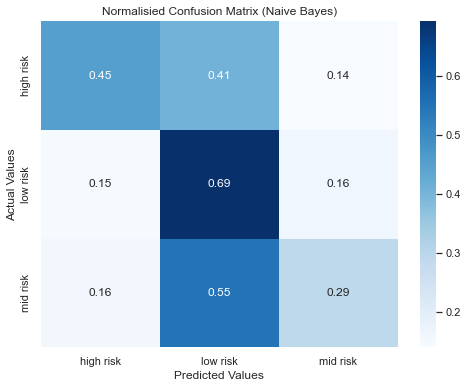

In [289]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

# Predicting the Test set results
MNB_pred = MNB.predict(X_test)

# accuracy on X_test
accuracy = MNB.score(X_test, y_test)
print('Accuracy score: %.3f' % accuracy)

# calculate precission, recall, fscore 
prf_score = precision_recall_fscore_support(y_test, MNB_pred, average='macro')
print('Precision : %.3f'% prf_score[0])
print('Recall : %.3f'% prf_score[1])
print('F-score : %.3f' % prf_score[2])

# calculate AUC
labels = df_encoded.RiskLevel.unique()
y_pred = label_binarize(MNB_pred, classes=labels)
auc_test = roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')
print('ROC AUC of test set: %.3f' % auc_test)

model_performance.loc['Naive Bayes','Accuracy score'] = prf_score[0]
model_performance.loc['Naive Bayes','Precision'] = prf_score[0]
model_performance.loc['Naive Bayes','Recall'] = prf_score[1]
model_performance.loc['Naive Bayes','F-score'] = prf_score[2]
model_performance.loc['Naive Bayes','ROC-AUC score'] = auc_test

# Visualize Confusion matrix 
cm = multilabel_confusion_matrix(y_test, MNB_pred)
cm

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, MNB_pred)
cm

# Normalised Confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm,
                     index = ['high risk', 'low risk', 'mid risk'], 
                     columns = ['high risk', 'low risk', 'mid risk'])

# plotting the confusion matrix
plt.figure(figsize =(5, 4))
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Normalisied Confusion Matrix (Naive Bayes)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show();

In [290]:
model_performance

,Accuracy score,Precision,Recall,F-score,ROC-AUC score
Decision Tree,0.81,0.81,0.82,0.81,0.86
Random Forest,0.82,0.82,0.82,0.82,0.87
Naive Bayes,0.50,0.50,0.48,0.48,0.61
K-NN,NaN,NaN,NaN,NaN,NaN


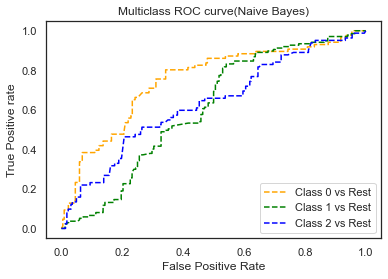

In [268]:
#predicting the data
y_pred_cnb = MNB.predict(X_test)
y_prob_pred_MNB = MNB.predict_proba(X_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_MNB, multi_class='ovo', average='weighted')

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_MNB[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve(Naive Bayes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [300]:
# cross validation based score
scores = cross_val_score(MNB, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=15, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.48871573 0.39294872 0.63849497 0.47518769 0.32887925 0.45448925
 0.37770124 0.56267436 0.39970168 0.45339912 0.40981579 0.24797287
 0.51493059 0.38637574 0.61782662]
0.45 accuracy with a standard deviation of 0.10


In [334]:
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

for i in np.arange(0.05, 1, 0.1):
          model = MultinomialNB(alpha=i, fit_prior=False)
          s1 = cross_val_score(model, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=cv, n_jobs=-1)
          print("Alpha %.1f : %0.2f accuracy with a standard deviation of %0.2f" % (i, s1.mean(), s1.std()))

Alpha 0.1 : 0.47 accuracy with a standard deviation of 0.06
Alpha 0.2 : 0.47 accuracy with a standard deviation of 0.06
Alpha 0.3 : 0.47 accuracy with a standard deviation of 0.06
Alpha 0.4 : 0.47 accuracy with a standard deviation of 0.06
Alpha 0.5 : 0.47 accuracy with a standard deviation of 0.06
Alpha 0.6 : 0.47 accuracy with a standard deviation of 0.06
Alpha 0.7 : 0.47 accuracy with a standard deviation of 0.06
Alpha 0.8 : 0.47 accuracy with a standard deviation of 0.06
Alpha 0.9 : 0.47 accuracy with a standard deviation of 0.06
Alpha 1.0 : 0.47 accuracy with a standard deviation of 0.06


In [320]:
# Hyperparameter tuning
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# 'class_prior': ['True','False'] 
MNB_para = {'alpha': np.arange(0.05 ,1, 0.05),'fit_prior': ['True','False']}
MNB = GridSearchCV(MultinomialNB(), MNB_para, cv=cv, scoring = 'accuracy')
MNB.fit(X_train, y_train)

MNB.best_params_

{'alpha': 0.45, 'fit_prior': 'True'}

KNN Results
Accuracy score: 0.803
Precision : 0.802
Recall : 0.803
F-score : 0.801
ROC AUC of test set: 0.852


<Figure size 360x288 with 0 Axes>

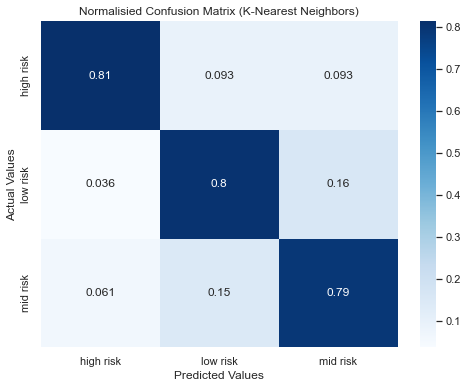

In [291]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

# Predicting the Test set results
KNN_pred = KNN.predict(X_test)

print('KNN Results')

# accuracy on X_test
accuracy = KNN.score(X_test, y_test)
print('Accuracy score: %.3f' % accuracy)

# calculate precission, recall, fscore 
prf_score = precision_recall_fscore_support(y_test, KNN_pred, average='macro')
print('Precision : %.3f'% prf_score[0])
print('Recall : %.3f'% prf_score[1])
print('F-score : %.3f' % prf_score[2])

# calculate AUC
labels = df_encoded.RiskLevel.unique()
y_pred = label_binarize(KNN_pred, classes=labels)
auc_test = roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')
print('ROC AUC of test set: %.3f' % auc_test)

model_performance.loc['K-NN','Accuracy score'] = prf_score[0]
model_performance.loc['K-NN','Precision'] = prf_score[0]
model_performance.loc['K-NN','Recall'] = prf_score[1]
model_performance.loc['K-NN','F-score'] = prf_score[2]
model_performance.loc['K-NN','ROC-AUC score'] = auc_test

# Visualize Confusion matrix 
cm = multilabel_confusion_matrix(y_test, KNN_pred)
cm

# Creating  a confusion matrix,which compares the y_test and KNN_pred
cm = confusion_matrix(y_test, KNN_pred)
cm

# Normalised Confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm,
                     index = ['high risk', 'low risk', 'mid risk'], 
                     columns = ['high risk', 'low risk', 'mid risk'])

# plotting the confusion matrix
plt.figure(figsize =(5, 4))
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Normalisied Confusion Matrix (K-Nearest Neighbors)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show();

In [333]:
# cross validation based score
scores = cross_val_score(KNN, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=15, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.93953343 0.93093728 0.95757412 0.83562975 0.80880145 0.68541809
 0.7000688  0.89427468 0.94360537 0.79071374 0.79898831 0.75234838
 0.78070175 0.91236219 0.88648148]
0.84 accuracy with a standard deviation of 0.09


In [349]:
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

for i in range(10, 0, -1):
          model = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2)
          s1 = cross_val_score(model, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=cv, n_jobs=-1)
          print("n_neighbours %.1d : %0.2f accuracy with a standard deviation of %0.2f" % (i, s1.mean(), s1.std()))

n_neighbours 10 : 0.69 accuracy with a standard deviation of 0.05
n_neighbours 9 : 0.68 accuracy with a standard deviation of 0.05
n_neighbours 8 : 0.69 accuracy with a standard deviation of 0.05
n_neighbours 7 : 0.70 accuracy with a standard deviation of 0.05
n_neighbours 6 : 0.72 accuracy with a standard deviation of 0.05
n_neighbours 5 : 0.71 accuracy with a standard deviation of 0.04
n_neighbours 4 : 0.71 accuracy with a standard deviation of 0.05
n_neighbours 3 : 0.71 accuracy with a standard deviation of 0.05
n_neighbours 2 : 0.78 accuracy with a standard deviation of 0.05
n_neighbours 1 : 0.84 accuracy with a standard deviation of 0.04


In [347]:
# Hyperparameter tuning
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# 'class_prior': ['True','False'] 
KNN_para = {'n_neighbors': np.arange(1, 10), 'p' : np.arange(1, 5)}
KNN = GridSearchCV(KNeighborsClassifier(), KNN_para, cv=cv, scoring = 'accuracy')
KNN.fit(X_train, y_train)

KNN.best_params_

{'n_neighbors': 1, 'p': 1}

In [292]:
model_performance

,Accuracy score,Precision,Recall,F-score,ROC-AUC score
Decision Tree,0.81,0.81,0.82,0.81,0.86
Random Forest,0.82,0.82,0.82,0.82,0.87
Naive Bayes,0.50,0.50,0.48,0.48,0.61
K-NN,0.80,0.80,0.80,0.80,0.85


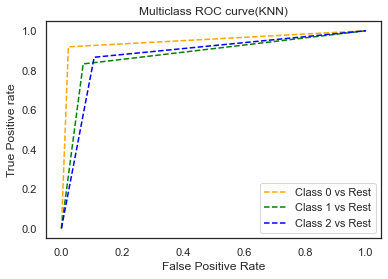

In [269]:
#predicting the data
y_pred_knn = KNN.predict(X_test)
y_prob_pred_knn = KNN.predict_proba(X_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_knn, multi_class='ovo', average='weighted')

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_knn[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve(KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [253]:
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=30)
s1 = cross_val_score(model, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=cv, n_jobs=-1)

model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
s2 = cross_val_score(model, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=cv, n_jobs=-1)

model = MultinomialNB()
s3 = cross_val_score(model, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=cv, n_jobs=-1)

model = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
s4 = cross_val_score(model, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=cv, n_jobs=-1)

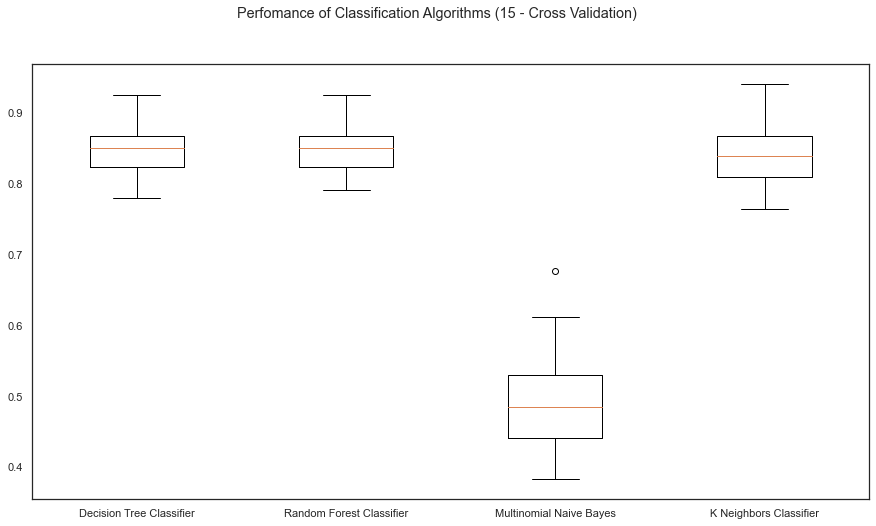

<Figure size 432x288 with 0 Axes>

In [254]:
s = [s1, s2, s3, s4]
model = ['Decision Tree Classifier', 'Random Forest Classifier', 'Multinomial Naive Bayes', 'K Neighbors Classifier']

fig = plt.figure(figsize=(15,8))
fig.suptitle('Perfomance of Classification Algorithms (15 - Cross Validation)')
ax = fig.add_subplot(111)
plt.boxplot(s)
ax.set_xticklabels(model)
plt.show()
plt.savefig("model.png")

In [255]:
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

for i in range(1, 11):
          model = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
          s1 = cross_val_score(model, df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'], cv=cv, n_jobs=-1)
          print(s1.mean())

0.7780948200175595
0.8077260755048288
0.8280557994342014
0.8428494780996976
0.8418593307969954
0.8487952394888303
0.8438591356940784
0.8488098722075894
0.8458589405911618
0.8504780021461321


In [256]:
## oversampling using smote
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_o, y_o = oversample.fit_resample(df_encoded.drop('RiskLevel', axis=1), df_encoded['RiskLevel'])

test_size= 0.30
seed = 100

X_train_o, X_test_o, y_train_o, y_test_o= train_test_split(X_o, y_o, test_size=test_size, random_state=seed)

Accuracy score: 0.836
Precision : 0.835
Recall : 0.837
F-score : 0.835
ROC AUC of test set: 0.877


<Figure size 360x288 with 0 Axes>

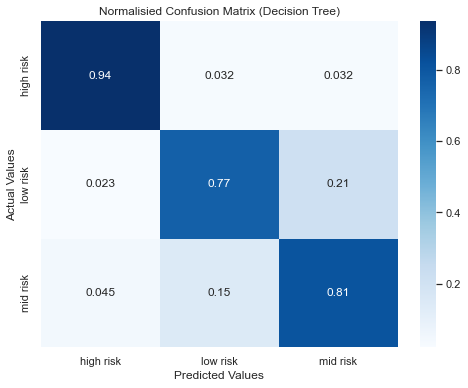

In [257]:
# training a Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree.fit(X_train_o, y_train_o)

# Predicting the Test set results
dtree_pred_o = dtree.predict(X_test_o)

# accuracy on X_test_o
accuracy = dtree.score(X_test_o, y_test_o)
#accuracy = dtree.score(X_train, y_train)
print('Accuracy score: %.3f' % accuracy)

# calculate precission, recall, fscore 
prf_score = precision_recall_fscore_support(y_test_o, dtree_pred_o, average='macro')
print('Precision : %.3f'% prf_score[0])
print('Recall : %.3f'% prf_score[1])
print('F-score : %.3f' % prf_score[2])

# calculate AUC
labels = df_encoded.RiskLevel.unique()
y_pred = label_binarize(dtree_pred_o, classes=labels)
#print(y_pred)
auc_test = roc_auc_score(y_test_o, y_pred,average='macro',multi_class='ovo')
print('ROC AUC of test set: %.3f' % auc_test)

# Visualize Confusion matrix 
cm = multilabel_confusion_matrix(y_test_o, dtree_pred_o)
cm

cm = confusion_matrix(y_test_o, dtree_pred_o)
cm

# Normalised Confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm,
                     index = ['high risk', 'low risk', 'mid risk'], 
                     columns = ['high risk', 'low risk', 'mid risk'])

# plotting the confusion matrix
plt.figure(figsize =(5, 4))
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Normalisied Confusion Matrix (Decision Tree)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show();

Accuracy score: 0.850
Precision : 0.850
Recall : 0.850
F-score : 0.849
ROC AUC of test set: 0.888


<Figure size 360x288 with 0 Axes>

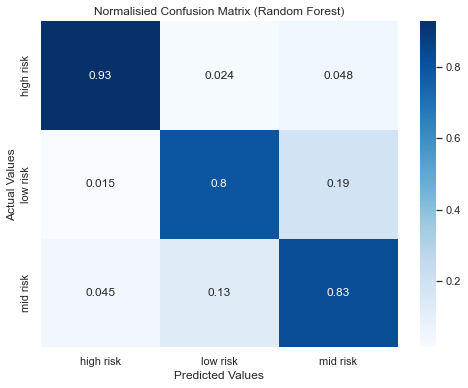

In [258]:
# training a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train_o, y_train_o)

# Predicting the Test set results
RF_pred_o = RF.predict(X_test_o)

# accuracy on X_test_o
accuracy = RF.score(X_test_o, y_test_o)
print('Accuracy score: %.3f' % accuracy)

# calculate precission, recall, fscore 
prf_score = precision_recall_fscore_support(y_test_o, RF_pred_o, average='macro')
print('Precision : %.3f'% prf_score[0])
print('Recall : %.3f'% prf_score[1])
print('F-score : %.3f' % prf_score[2])

# calculate AUC
labels = df_encoded.RiskLevel.unique()
y_pred_o = label_binarize(RF_pred_o, classes=labels)
auc_test = roc_auc_score(y_test_o, y_pred_o,average='macro',multi_class='ovo')
print('ROC AUC of test set: %.3f' % auc_test)

# Visualize Confusion matrix 
cm = multilabel_confusion_matrix(y_test_o, RF_pred_o)
cm

# Creating  a confusion matrix,which compares the y_test_o and RF_pred_o
cm = confusion_matrix(y_test_o, RF_pred_o)
cm

# Normalised Confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm,
                     index = ['high risk', 'low risk', 'mid risk'], 
                     columns = ['high risk', 'low risk', 'mid risk'])

# plotting the confusion matrix
plt.figure(figsize =(5, 4))
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Normalisied Confusion Matrix (Random Forest)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show();

Accuracy score: 0.462
Precision : 0.469
Recall : 0.455
F-score : 0.455
ROC AUC of test set: 0.591


<Figure size 360x288 with 0 Axes>

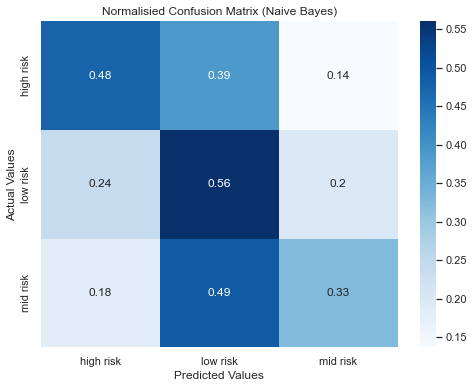

In [259]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_o, y_train_o)

# Predicting the Test set results
MNB_pred_o = MNB.predict(X_test_o)

# accuracy on X_test_o
accuracy = MNB.score(X_test_o, y_test_o)
print('Accuracy score: %.3f' % accuracy)

# calculate precission, recall, fscore 
prf_score = precision_recall_fscore_support(y_test_o, MNB_pred_o, average='macro')
print('Precision : %.3f'% prf_score[0])
print('Recall : %.3f'% prf_score[1])
print('F-score : %.3f' % prf_score[2])

# calculate AUC
labels = df_encoded.RiskLevel.unique()
y_pred = label_binarize(MNB_pred_o, classes=labels)
auc_test = roc_auc_score(y_test_o, y_pred,average='macro',multi_class='ovo')
print('ROC AUC of test set: %.3f' % auc_test)

# Visualize Confusion matrix 
cm = multilabel_confusion_matrix(y_test_o, MNB_pred_o)
cm

# Creating  a confusion matrix,which compares the y_test_o and y_pred
cm = confusion_matrix(y_test_o, MNB_pred_o)
cm

# Normalised Confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm,
                     index = ['high risk', 'low risk', 'mid risk'], 
                     columns = ['high risk', 'low risk', 'mid risk'])

# plotting the confusion matrix
plt.figure(figsize =(5, 4))
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Normalisied Confusion Matrix (Naive Bayes)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show();

KNN Results
Accuracy score: 0.820
Precision : 0.820
Recall : 0.820
F-score : 0.819
ROC AUC of test set: 0.865


<Figure size 360x288 with 0 Axes>

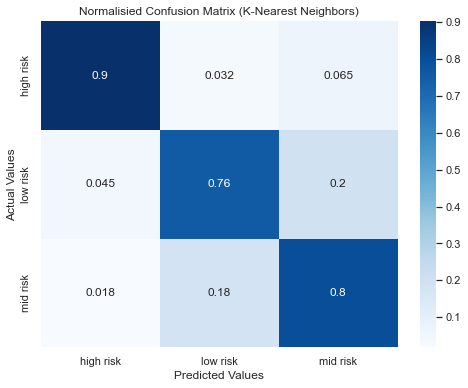

In [260]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
KNN.fit(X_train_o, y_train_o)

# Predicting the Test set results
KNN_pred_o = KNN.predict(X_test_o)

print('KNN Results')

# accuracy on X_test_o
accuracy = KNN.score(X_test_o, y_test_o)
print('Accuracy score: %.3f' % accuracy)

# calculate precission, recall, fscore 
prf_score = precision_recall_fscore_support(y_test_o, KNN_pred_o, average='macro')
print('Precision : %.3f'% prf_score[0])
print('Recall : %.3f'% prf_score[1])
print('F-score : %.3f' % prf_score[2])

# calculate AUC
labels = df_encoded.RiskLevel.unique()
y_pred = label_binarize(KNN_pred_o, classes=labels)
auc_test = roc_auc_score(y_test_o, y_pred,average='macro',multi_class='ovo')
print('ROC AUC of test set: %.3f' % auc_test)

# Visualize Confusion matrix 
cm = multilabel_confusion_matrix(y_test_o, KNN_pred_o)
cm

# Creating  a confusion matrix,which compares the y_test_o and KNN_pred_o
cm = confusion_matrix(y_test_o, KNN_pred_o)
cm

# Normalised Confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm,
                     index = ['high risk', 'low risk', 'mid risk'], 
                     columns = ['high risk', 'low risk', 'mid risk'])

# plotting the confusion matrix
plt.figure(figsize =(5, 4))
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Normalisied Confusion Matrix (K-Nearest Neighbors)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show();